In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/car_data.csv')
df.head()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,NaN,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual


This shows that the dataset has a large number of NaN values for the column 'Version'. Also note the the price colujmn should be of `float` type.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80572 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Make             80572 non-null  object
 1   Model            80572 non-null  object
 2   Version          73800 non-null  object
 3   Price            80572 non-null  object
 4   Make_Year        80572 non-null  int64 
 5   CC               80572 non-null  int64 
 6   Assembly         80572 non-null  object
 7   Mileage          80572 non-null  int64 
 8   Registered City  80572 non-null  object
 9   Transmission     80572 non-null  object
dtypes: int64(3), object(7)
memory usage: 6.1+ MB


The entity with engine power of 1CC and 10000CC and mileage 1 looks fishy...

In [ ]:
df.describe()

,Make_Year,CC,Mileage
count,80572.000000,80572.000000,80572.000000
mean,2011.724209,1404.083267,85653.660080
std,6.953399,684.458171,82241.870901
min,1990.000000,1.000000,1.000000
25%,2007.000000,1000.000000,36500.000000
50%,2013.000000,1300.000000,73000.000000
75%,2017.000000,1600.000000,110520.000000
max,2021.000000,10000.000000,999999.000000


In [ ]:
df.describe(include=['object', 'category'])

,Make,Model,Version,Price,Assembly,Registered City,Transmission
count,80572,80572,73800,80572,80572,80572,80572
unique,66,389,1339,2229,2,187,2
top,Toyota,Corolla,GLi 1.3 VVTi,Call for price,Local,Lahore,Automatic
freq,29793,15502,3319,1209,54498,27051,40408


In [ ]:
df[df['CC'] == 1]

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
876,Toyota,Vitz,NaN,1950000.0,2011,1,Imported,10000,Lahore,Automatic
1312,Toyota,Coaster,NaN,6500000.0,2011,1,Imported,123454,Lahore,Manual
8241,Suzuki,Carry,Standard,930000.0000000001,2016,1,Local,1,Rawalpindi,Manual
13554,Suzuki,Alto,NaN,1100000.0,2008,1,Imported,5,Islamabad,Automatic
14977,Toyota,Vitz,NaN,2850000.0,2018,1,Imported,59000,Un-Registered,Automatic
15421,Toyota,Corolla,NaN,2150000.0,2014,1,Imported,120000,Lahore,Manual


We could've selected counts for individual models of Toyota/Suzuki cars which show engine capacity as 1CC, but they wouldn't have as substantial counts as the counts of cars with Toyota.

So we will select the median of engine capacity values of Toyota cars.

In [ ]:
val, counts = np.unique(df['Make'].values, return_counts=True)
print('Counts of cars of make Toyota are: ', counts[np.where(val == 'Toyota')[0]])
print('Counts of cars of make Suzuki are: ', counts[np.where(val == 'Suzuki')[0]])

Counts of cars of make Toyota are:  [29793]
Counts of cars of make Suzuki are:  [24209]


In [ ]:
df.loc[(df['Make'] == 'Toyota') & (df['CC'] == 1), ['CC']] = df.loc[df['Make'] == 'Toyota', 'CC'].median()

In [ ]:
df.loc[(df['Make'] == 'Suzuki') & (df['CC'] == 1), ['CC']] = df.loc[df['Make'] == 'Suzuki', 'CC'].median()

In [ ]:
df[df['CC'] == 10000]

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
4283,Toyota,Passo,NaN,1860000.0000000002,2014,10000,Imported,64000,Karachi,Automatic
12920,Suzuki,Khyber,NaN,170000.0,1991,10000,Local,100000,Karachi,Manual


I can vouch for the fact that Khyber and Passo can have engine capacity of 1000CC and the extra must be a typo. But since I dont know what capacity do the variants of Vitz, Coaster, etc. have therefore I'll replace them with median engine capacity value of their class. 

In [ ]:
df.loc[df['CC'] == 10000, ['CC']] = 1000

Well, we still have values with engine capacity less 
than 600CC. So I might just replace all the values lesss than 600 with the overall median. 

In [ ]:
df.describe()

,Make_Year,CC,Mileage
count,80572.000000,80572.000000,80572.000000
mean,2011.724209,1403.954116,85653.660080
std,6.953399,683.019608,82241.870901
min,1990.000000,5.000000,1.000000
25%,2007.000000,1000.000000,36500.000000
50%,2013.000000,1300.000000,73000.000000
75%,2017.000000,1600.000000,110520.000000
max,2021.000000,8494.000000,999999.000000


In [ ]:
df.loc[df['CC'] < 600, ['CC']] = df['CC'].median()

Let's move on to mileage then...

In [ ]:
df.describe()

,Make_Year,CC,Mileage
count,80572.000000,80572.000000,80572.000000
mean,2011.724209,1404.411669,85653.660080
std,6.953399,682.547574,82241.870901
min,1990.000000,600.000000,1.000000
25%,2007.000000,1000.000000,36500.000000
50%,2013.000000,1300.000000,73000.000000
75%,2017.000000,1600.000000,110520.000000
max,2021.000000,8494.000000,999999.000000


In [ ]:
df[df['Mileage'] == 1]['Make_Year'].value_counts()

2021    1024
2020      31
2006      29
2005      22
2008      16
2004      16
2009      15
2007      13
2011      13
2012      11
2002      11
2010      10
2016      10
1998       8
1997       8
1994       7
1992       7
2003       7
2013       7
2000       6
2014       6
2018       5
1995       5
1991       5
1993       4
1996       4
2017       4
2019       4
1999       3
2015       2
2001       1
1990       1
Name: Make_Year, dtype: int64

In [ ]:
list(range(2021, 2010, -1))

[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]

Since Mileage is directly proportional to the `Make_Year`, therefore we can make 5 tiers with the intuition that the lower the `Make_Year`, the higher will be the mileage.

In [ ]:
maxYear, minYear = df['Make_Year'].max(), df['Make_Year'].min()
print(maxYear, minYear)

2021 1990


In [ ]:
tier1, tier2, tier3, tier4, tier5 = np.array_split(np.array(list(range(minYear, maxYear + 1, 1))), 5)
print(tier1)
print(tier2)
print(tier3)
print(tier4)
print(tier5)

[1990 1991 1992 1993 1994 1995 1996]
[1997 1998 1999 2000 2001 2002 2003]
[2004 2005 2006 2007 2008 2009]
[2010 2011 2012 2013 2014 2015]
[2016 2017 2018 2019 2020 2021]


In [ ]:
tier1_median = df.loc[df['Make_Year'].isin(tier1), 'Mileage'].median()
tier2_median = df.loc[df['Make_Year'].isin(tier2), 'Mileage'].median()
tier3_median = df.loc[df['Make_Year'].isin(tier3), 'Mileage'].median()
tier4_median = df.loc[df['Make_Year'].isin(tier4), 'Mileage'].median()
tier5_median = df.loc[df['Make_Year'].isin(tier5), 'Mileage'].median()

print(tier1_median)
print(tier2_median)
print(tier3_median)
print(tier4_median)
print(tier5_median)

100000.0
123400.0
105000.0
85000.0
34700.0


In [ ]:
df.loc[(df['Make_Year'].isin(tier1)) & (df['Mileage'] == 1), ['Mileage']] = tier1_median
df.loc[(df['Make_Year'].isin(tier2)) & (df['Mileage'] == 1), ['Mileage']] = tier2_median
df.loc[(df['Make_Year'].isin(tier3)) & (df['Mileage'] == 1), ['Mileage']] = tier3_median
df.loc[(df['Make_Year'].isin(tier4)) & (df['Mileage'] == 1), ['Mileage']] = tier4_median
df.loc[(df['Make_Year'].isin(tier5)) & (df['Mileage'] == 1), ['Mileage']] = tier5_median

... \
There are values that still in ranges of 2-10 for the `Mileage` column, so we might just fill them with the mileage of the year thats most common in the dataset of cars with mileages less than 500. 

In [ ]:
mode_year = df[df['Mileage'] < 1000]['Make_Year'].value_counts().index[0]
df.loc[df['Mileage'] < 500, 'Mileage'] = df.loc[df['Make_Year'] == mode_year, 'Mileage'].mean()

Now lets check why the price column is of `'object'` type by typing the regex to match any sequrence of alphabets. We see that it contains people who say 'DM for price' whenever asked for price...

In [ ]:
df[df['Price'].str.contains('[a-zA-Z]+', regex=True)]

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
25,MG,HS,1.5 Turbo,Call for price,2021,1500,Imported,9581.28056,Un-Registered,Automatic
27,MG,HS,1.5 Turbo,Call for price,2021,1500,Local,9581.28056,Un-Registered,Automatic
43,Toyota,Hilux,Revo V Automatic 2.8,Call for price,2021,2800,Local,9581.28056,Un-Registered,Automatic
50,Honda,Civic,Oriel 1.8 i-VTEC CVT,Call for price,2018,1800,Local,63000.00000,Islamabad,Automatic
78,Toyota,Aqua,S,Call for price,2017,1500,Imported,45000.00000,Un-Registered,Automatic
...,...,...,...,...,...,...,...,...,...,...
78179,Suzuki,Bolan,VX Euro II,Call for price,2021,800,Local,9581.28056,Un-Registered,Manual
78401,Suzuki,Alto,ECO-S,Call for price,2014,660,Imported,55000.00000,Islamabad,Automatic
79059,Isuzu,D-Max,V-Cross Automatic 3.0,Call for price,2019,3000,Imported,500.00000,Karachi,Automatic
79124,Suzuki,Cultus,VXR (CNG),Call for price,2005,1000,Local,50000.00000,Karachi,Manual


In [ ]:
str_above50 = df[df['Price'].str.contains('[a-zA-Z]+', regex=True)]['Model'].value_counts()
idx = list(str_above50[str_above50 > 50].index)
print(idx)

['Corolla', 'Prado', 'Land', 'Vitz', 'Civic']


1209 is a substantial amount of data and we cannot simply drop this, so we will be replacing the price with their respective medians from the dataset which doesnot contain any `str` value.

In [ ]:
non_str = df[(df['Price'].str.contains('\d+', regex=True))]

In [ ]:
non_str = df[(df['Price'].str.contains('\d+', regex=True))]

for make in idx:
  df.loc[(df['Price'].str.contains('Call')) & (df['Model'] == make), 'Price'] = non_str.loc[non_str['Model'] == make, 'Price'].astype(np.float64).mean()

In [ ]:
df.loc[(df['Price'].str.contains('Call', na=False)), ['Make', 'Model']]['Make'].value_counts()

Toyota        264
Honda         105
Suzuki        102
KIA            54
MG             33
Mercedes       33
Hyundai        30
Daihatsu       29
Changan        27
Nissan         25
Audi           20
Mitsubishi     10
Mazda           8
Prince          8
Lexus           6
BMW             5
DFSK            5
Ford            4
Porsche         3
Range           2
JMC             1
Master          1
JW              1
Chevrolet       1
Chrysler        1
Volkswagen      1
Isuzu           1
Name: Make, dtype: int64

In [ ]:
valCounts = df.loc[(df['Price'].str.contains('Call', na=False)), ['Make', 'Model']]['Make'].value_counts()
idx, val = valCounts.index[0], valCounts.values

for i in range(len(idx)):
  if val[i] < 5:
    df.drop()

In [ ]:
valCounts = df.loc[(df['Price'].str.contains('Call', na=False)), ['Make', 'Model']]['Make'].value_counts()
idx, val = list(valCounts.index), valCounts.values

for car in idx:
  df.loc[(df['Price'].str.contains('Call', na=False)), 'Price'] = non_str.loc[non_str['Make'] == car, 'Price'].astype(np.float64).mean()

Now that we've taken care of all the `str` values, we can convert this into a `float64` type

In [ ]:
df['Price'] = df['Price'].astype(np.float64)

Moving on to removing the NaN values in 'Version', the variant of the car holds important imformation to know the category of price of a car therefore we will not drop these rows.

We will analyse [these](https://youtube.com/shorts/sUUXimRu4wM?feature=share) values which Suneel Munj talks about... :D

In [ ]:
nanVals = df.loc[df['Version'].isna(), ['Make', 'Model']].values

for make, model in nanVals:
  try:
    df.loc[(df['Make'] == make) & (df['Model'] == model) & (df['Version'].isna()==True), 'Version'] = df.loc[(df['Make'] == make) & (df['Model'] == model) & (df['Version'].isna()==False), 'Version'].mode()[0]
  except:
    df.loc[(df['Make'] == make) & (df['Model'] == model) & (df['Version'].isna()==True), 'Version'] = 'unknown'

There should be a better way to do this, frequent indexing of multiple columns is not good...

<ipython-input-31-99e478e1ba2a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


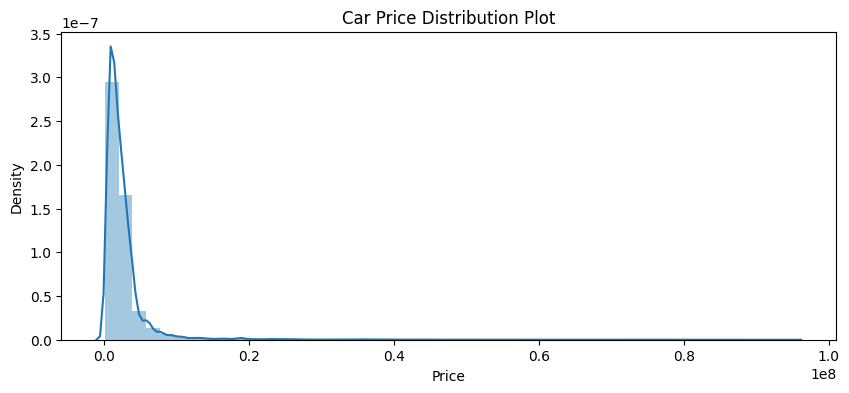

In [ ]:
plt.figure(figsize=(10,4))

plt.title('Car Price Distribution Plot')
sns.distplot(df.Price)

plt.show()

In [ ]:
df.shape

(80572, 10)

#Data Preparation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

One-hot encoding the categorical data 

In [ ]:
df_dummies = pd.get_dummies(df, columns=['Make', 'Model', 'Version', 'Assembly', 'Registered City', 'Transmission'], drop_first = True)

In [ ]:

scaler = MinMaxScaler()
numerical_vars = ['Price', 'Make_Year', 'CC', 'Mileage']
df_dummies[numerical_vars] = scaler.fit_transform(df_dummies[numerical_vars])

X = df_dummies.drop(['Price'], axis=1)
Y = df_dummies['Price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

First, according to intuition + examples online + plus the nature of dataset where a variable being proportional to the price column directly/indirectly affects the price, which calls for `y=mx+b` like equation to be applied on the model.

Later on we can use a more general and trusted RandomForest on the dataset.

##?????
.....

In [ ]:
#RFE for RandomForest owing to computing times

linearReg = LinearRegression(n_jobs=2)
linearReg.fit(x_train, y_train)
y_pred= linearReg.predict(x_test)
print("Accuracy on Testing set: ", r2_score(y_test, y_pred))

Accuracy on Testing set:  -7.717166982768944e+18


Very poor accuracy, maybe because the model is having a hard time fitting all the 1980 columns. We'll try removing columns based on their coefficients


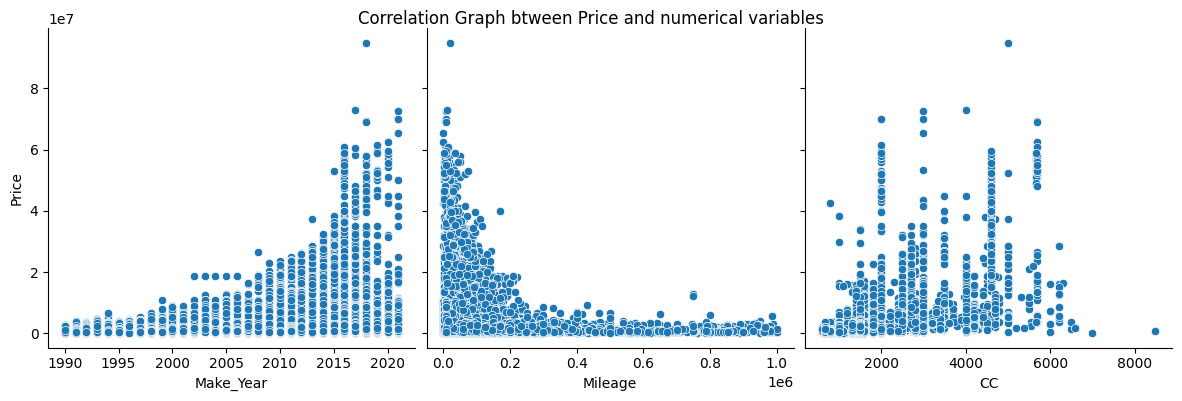

In [ ]:
y_vars=['Price']
x_vars=['Make_Year','Mileage','CC']
sns.pairplot(df, x_vars=x_vars, y_vars=y_vars, height=4, aspect=1, kind="scatter")
plt.suptitle('Correlation Graph btween Price and numerical variables')
plt.show()

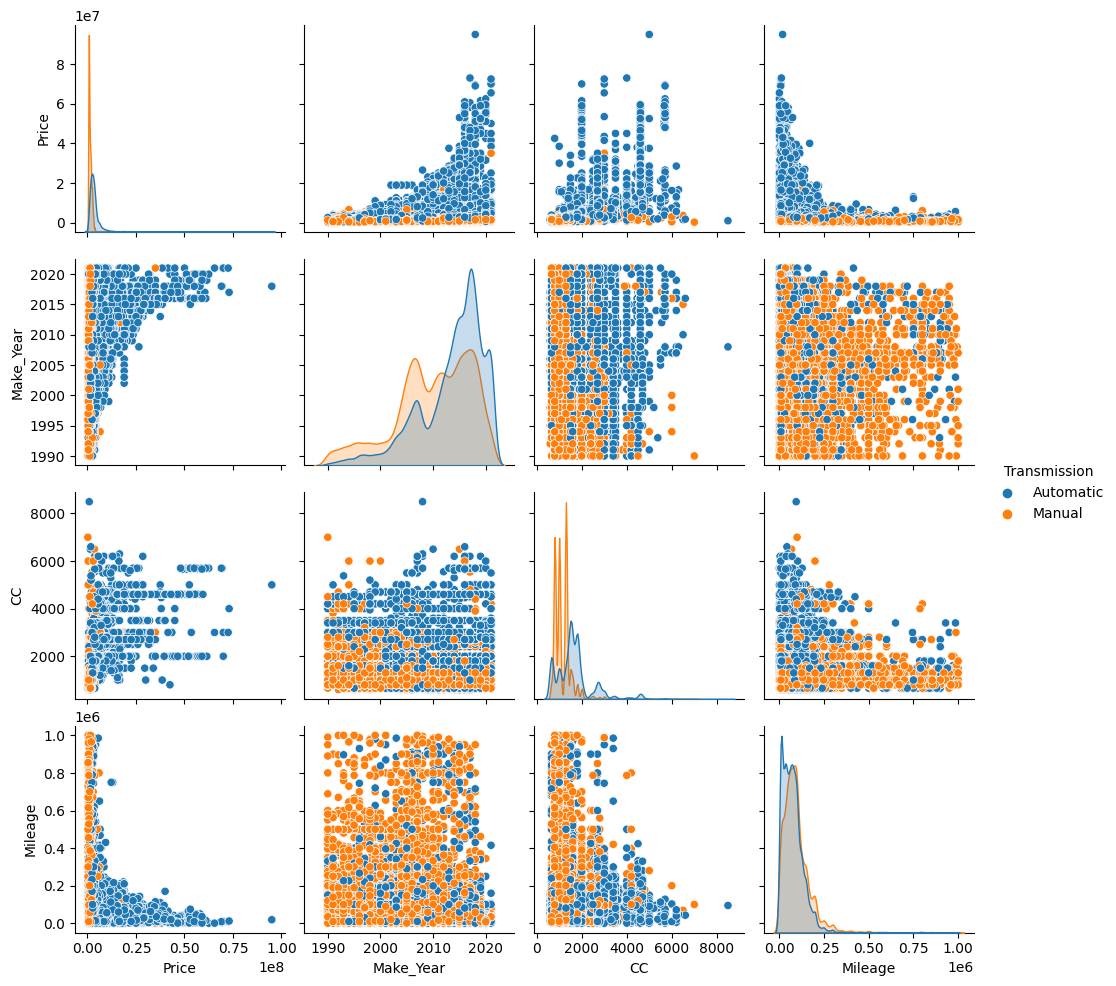

In [ ]:
sns.pairplot(data=df, diag_kind='kde', hue='Transmission')

In [ ]:
labels_rCity, cats_rCity = pd.factorize(df['Registered City'])
labels_make, cats_make = pd.factorize(df['Make'])
labels_Assembly, cats_Assembly = pd.factorize(df['Assembly'])
labels_Trans, cats_Transmission = pd.factorize(df['Transmission'])


In [ ]:
df2 = df.copy()
df2.drop(['Registered City', 'Make', 'Assembly', 'Transmission'], axis=1, inplace=True)
df2['Registered City'] = labels_rCity
df2['Make'] = labels_make
df2['Assembly'] = labels_Assembly
df2['Transmission'] = labels_Trans

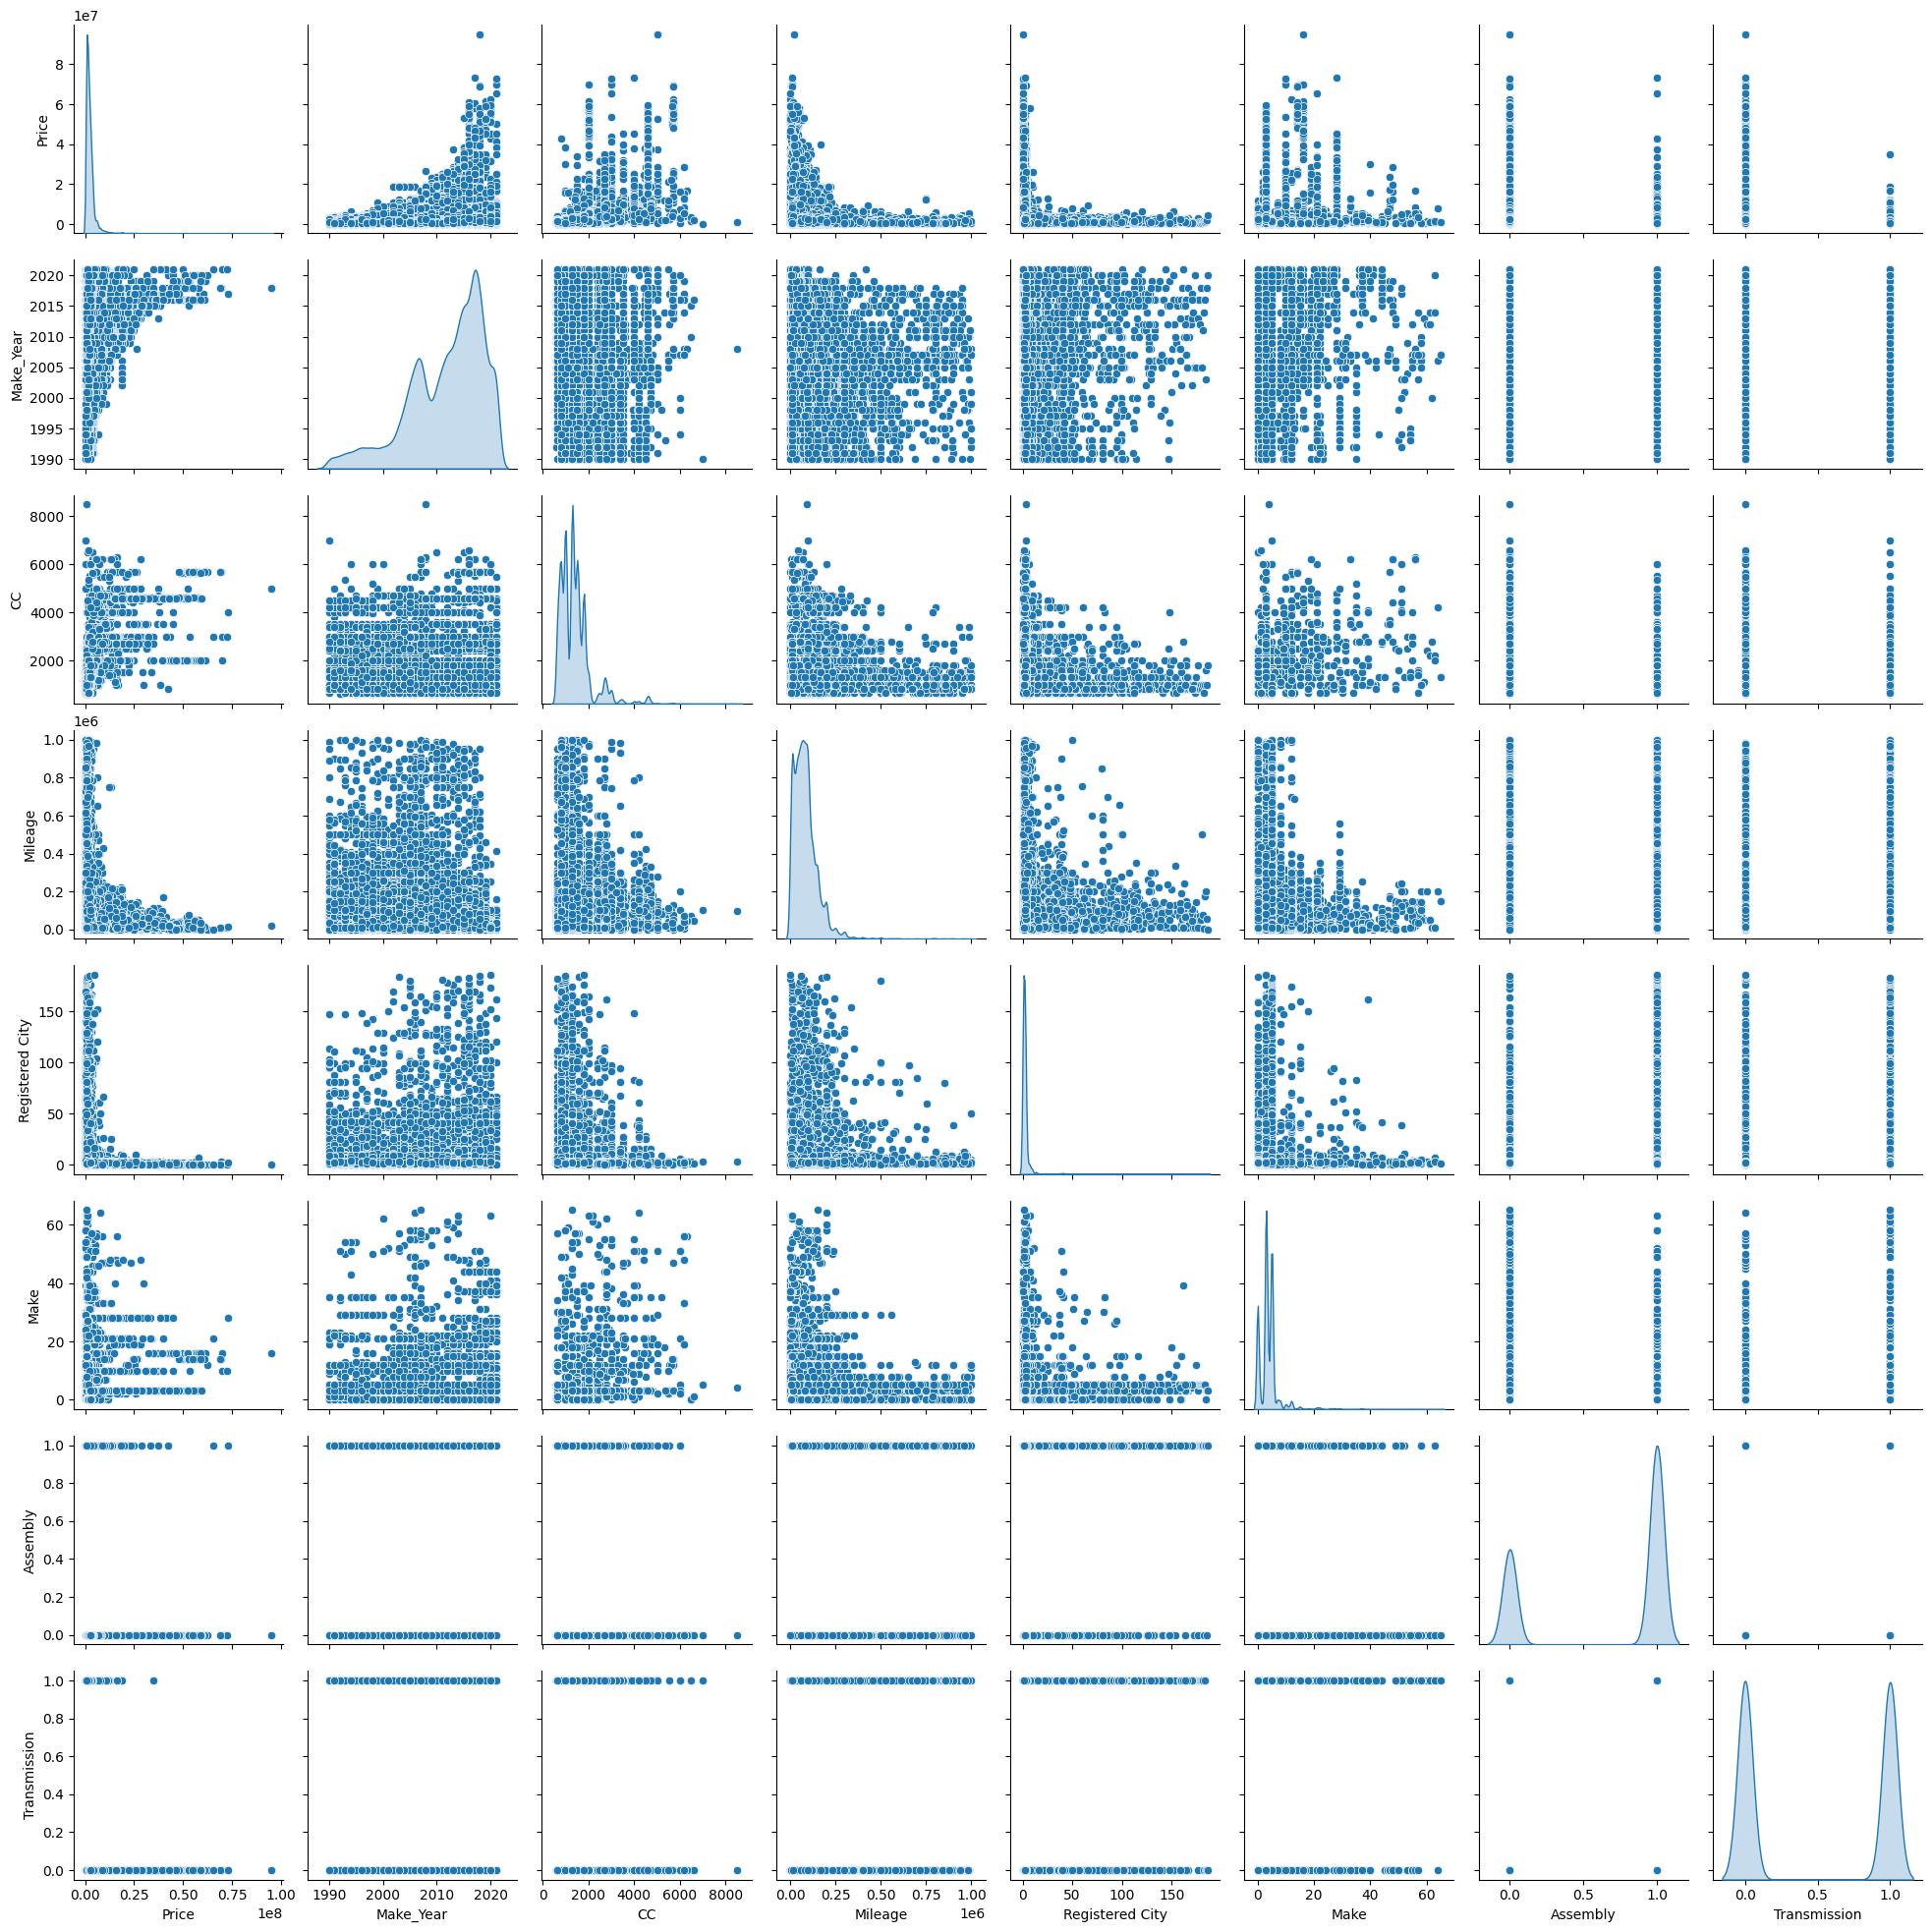

In [ ]:
sns.pairplot(data=df2, diag_kind='kde')

<ipython-input-42-99dbc1571a0c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<Axes: >

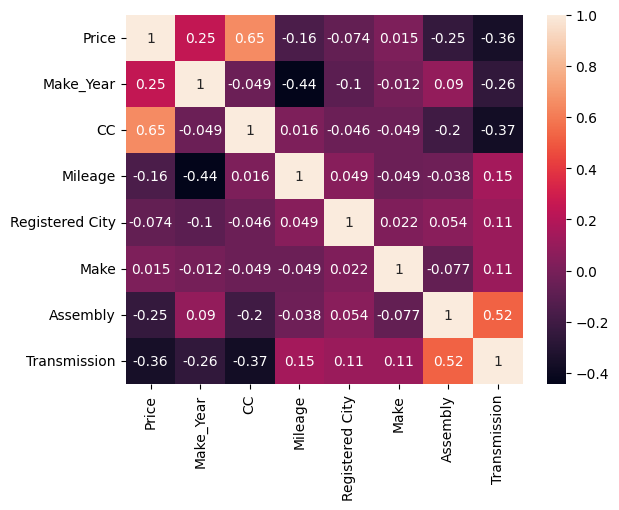

In [ ]:
sns.heatmap(df2.corr(), annot=True)

<ipython-input-43-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

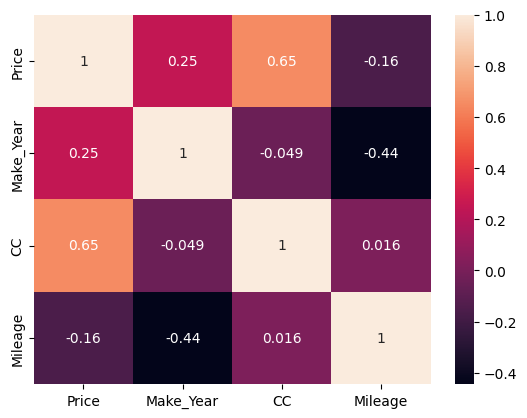

In [ ]:
sns.heatmap(df.corr(), annot=True)

Since Price correrelates very poorly with columns of 'Registered City' and 'Make', therefore we'll try try dropping these

In [ ]:
df_new = df.drop(['Registered City', 'Make', 'Version'], axis=1)
df_dummies_new = pd.get_dummies(df_new, columns=['Model', 'Assembly', 'Transmission'], drop_first = True)

scaler = MinMaxScaler()
numerical_vars = ['Price', 'Make_Year', 'CC', 'Mileage']
df_dummies_new[numerical_vars] = scaler.fit_transform(df_dummies[numerical_vars])

X_new = df_dummies_new.drop(['Price'], axis=1)
Y_new = df_dummies_new['Price']
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, Y_new, test_size=0.2, random_state=1234)

In [ ]:
linearReg = LinearRegression(n_jobs=2)
linearReg.fit(x_train_new, y_train_new)
y_pred_new= linearReg.predict(x_test_new)
print("Accuracy on Testing set: ", r2_score(y_test, y_pred_new))

Accuracy on Testing set:  -6.3005540866147746e+19


In [ ]:
from sklearn.svm import SVR

df_svr = df.drop(['Model', 'Version', 'Registered City'], axis=1)
df_dummies_svr = pd.get_dummies(df_svr, columns=['Make', 'Assembly', 'Transmission'], drop_first = True)

scaler = MinMaxScaler()
numerical_vars = ['Price', 'Make_Year', 'CC', 'Mileage']
df_svr[numerical_vars] = scaler.fit_transform(df_dummies[numerical_vars])

X_svr = df_dummies_svr.drop(['Price'], axis=1)
Y_svr = df_dummies_svr['Price']
x_train_svr, x_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, Y_svr, test_size=0.2, random_state=1234)
svr = SVR(kernel = 'rbf')
svr.fit(x_train_svr, y_train_svr)
y_pred_svr = svr.predict(x_test_svr)
print("Accuracy on Testing set: ", r2_score(y_test_svr, y_pred_svr))

Accuracy on Testing set:  -0.04902408759774168


##:(
Still poor, so we will be moving to non linear regression models to fit the data better

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df_poly = df.drop(['Model', 'Version'], axis=1)
cat_columns = ['Make', 'Assembly', 'Transmission', 'Registered City']
label_enc = LabelEncoder()
df_poly[cat_columns] = df_poly[cat_columns].apply(lambda x: label_enc.fit_transform(x))

scaler = MinMaxScaler()
numerical_vars = ['Price', 'Make_Year', 'CC', 'Mileage']
df_poly[numerical_vars] = scaler.fit_transform(df_poly[numerical_vars])

X_poly = df_poly.drop(['Price'], axis=1)
Y_poly = df_poly['Price']
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.2, random_state=1234)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features_train = poly.fit_transform(x_train_poly)
poly_features_test = poly.transform(x_test_poly)

linear_reg = LinearRegression()
linear_reg.fit(poly_features_train, y_train_poly)
y_pred_poly = linear_reg.predict(poly_features_test)

print("Accuracy on Testing set: ", r2_score(y_test_poly, y_pred_poly))

Accuracy on Testing set:  0.7689255663693954


In [ ]:
df.dtypes

Make                object
Model               object
Version             object
Price              float64
Make_Year            int64
CC                   int64
Assembly            object
Mileage            float64
Registered City     object
Transmission        object
dtype: object

In [ ]:
from sklearn.ensemble import RandomForestRegressor

df_rfr = df.drop(['Model', 'Version'], axis=1)
cat_columns = ['Make', 'Assembly', 'Transmission', 'Registered City']
label_enc = LabelEncoder()
df_rfr[cat_columns] = df_rfr[cat_columns].apply(lambda x: label_enc.fit_transform(x))

scaler = MinMaxScaler()
numerical_vars = ['Price', 'Make_Year', 'CC', 'Mileage']
df_rfr[numerical_vars] = scaler.fit_transform(df_rfr[numerical_vars])

X_rfr = df_rfr.drop(['Price'], axis=1)
Y_rfr = df_rfr['Price']
x_train_rfr, x_test_rfr, y_train_rfr, y_test_rfr = train_test_split(X_rfr, Y_rfr, test_size=0.2, random_state=654)
rfr = RandomForestRegressor(n_estimators=200, max_depth = 15, max_features='sqrt', verbose=1)
rfr.fit(x_train_rfr, y_train_rfr)
y_pred_rfr = rfr.predict(x_test_rfr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished


In [ ]:
print("Accuracy on Testing set: ", r2_score(y_test_rfr, y_pred_rfr))

Accuracy on Testing set:  0.8873635626939209


We've found the model with the best accuracy, now we'll fine tune using GridSearchCV to produce params which output the best accuracy.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80572 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             80572 non-null  object 
 1   Model            80572 non-null  object 
 2   Version          80572 non-null  object 
 3   Price            80572 non-null  float64
 4   Make_Year        80572 non-null  int64  
 5   CC               80572 non-null  int64  
 6   Assembly         80572 non-null  object 
 7   Mileage          80572 non-null  float64
 8   Registered City  80572 non-null  object 
 9   Transmission     80572 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 6.1+ MB


In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 40, 100],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200, 300, 400]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)
grid_search.fit(x_train_rfr, y_train_rfr)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 40, 100],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

These are the best parameters to use with `RandomForestRegressor` to achieve the best accuracy. Lets do some predictions with these params.

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [ ]:
best_params = grid_search.best_estimator_
y_pred_rfr_grid = best_params.predict(x_test_rfr)
print("Accuracy on Testing set: ", r2_score(y_test_rfr, y_pred_rfr_grid))

Accuracy on Testing set:  0.8891499391488064
